In [1]:
from functions import *
from PointNet import PointNet
from PointCNN import PointCNN

torch.manual_seed(12456789)
np.random.seed(12456789)

I0000 00:00:1711999025.464296       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Max
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1711999025.495846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Max


In [2]:
# Refer to functions.py if you want to merge multiple datasets

dataset1 = "./combined_asl_alphabet/Train_Alphabet"
# dataset2 = "./asl_dataset"
# dataset3 = "./extras"
destination_path1 = "./landmarks_1"
# destination_path2 = "./landmarks_2"
# destination_path3 = "./landmarks_3"

# CREATING DATASET DO NOT UNCOMMENT. 
# create_dataset(dataset1,destination_path1, transform)
# create_dataset(dataset2,destination_path2, transform)
# create_dataset(dataset3,destination_path3, transform)


In [3]:
# merge_folders(destination_path2, destination_path1)
# merge_folders(destination_path3, destination_path1)

In [4]:
items = load_dataset(destination_path1)

training, validation = random_split(items, [0.9, 0.1])
training_input_tensor = torch.Tensor([x[0] for x in training])
training_output_tensor = torch.LongTensor([int(x[1]) for x in training],device=device).long()
validation_input_tensor = torch.Tensor([x[0] for x in validation])
validation_output_tensor = torch.Tensor([int(x[1]) for x in validation], device=device).long()

/var/folders/3y/j1sjc53s5kd68c_jg7jw90pr0000gn/T/ipykernel_13291/2308339370.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  training_input_tensor = torch.Tensor([x[0] for x in training])


In [5]:
print("Training: ", training_input_tensor.shape, training_output_tensor.shape)
print("Validation: ", validation_input_tensor.shape, validation_output_tensor.shape)

Training:  torch.Size([43978, 21, 3]) torch.Size([43978])
Validation:  torch.Size([4886, 21, 3]) torch.Size([4886])


In [6]:
batch_size = 128
epochs = 10

print(len(char2int))
tensor_train_dataset = TensorDataset(training_input_tensor,training_output_tensor) 
train_dataloader = DataLoader(tensor_train_dataset, batch_size = batch_size, shuffle = True)
tensor_val_dataset = TensorDataset(validation_input_tensor,validation_output_tensor)
val_dataloader = DataLoader(tensor_val_dataset, batch_size = batch_size, shuffle = True)
model1 = PointNet(len(char2int)).to(device)
model2 = PointCNN(len(char2int)).to(device)

29


Model 1

In [7]:
loss_train_all1, acc_train_all1, loss_val_all1, acc_val_all1 = train_model(model1,epochs,train_dataloader,val_dataloader,"PointNet-LR0.0001",learn_rate=0.0001)

Current epoch:0
Acc train: 0.8811668909566347, Loss train: 0.8317665710265554, Acc val: 0.9631774471356318, Loss val: 0.2644093850484261,
Current epoch:1
Acc train: 0.9732528677166894, Loss train: 0.18586903682714978, Acc val: 0.9761618589743589, Loss val: 0.13947737331573778,
Current epoch:2


KeyboardInterrupt: 

Model 2

In [ ]:
loss_train_all2, acc_train_all2, loss_val_all2, acc_val_all2 = train_model(model1,epochs,train_dataloader,val_dataloader,"PointNet-LR0.00001",learn_rate=0.00001)

Current epoch:0
Loss train 0.008489783395076344 Loss val 0.04068547362485566 Acc train 0.9990977078329685 Acc val 0.9897836538461539
Current epoch:1
Loss train 0.006052565365301466 Loss val 0.03879233583425864 Acc train 0.9995684956395349 Acc val 0.9897836538461539
Current epoch:2
Loss train 0.005016004769903131 Loss val 0.03920681066273783 Acc train 0.9996820494186046 Acc val 0.9897836538461539
Current epoch:3
Loss train 0.004392611549836908 Loss val 0.038141570991287246 Acc train 0.9997274709302325 Acc val 0.9897836538461539
Current epoch:4
Loss train 0.00391128268140249 Loss val 0.03996385142016105 Acc train 0.9997956031976745 Acc val 0.9899839743589743
Current epoch:5
Loss train 0.003621926817157696 Loss val 0.03784900992953529 Acc train 0.9998410247093024 Acc val 0.9899839743589743
Current epoch:6
Loss train 0.0033219308551092263 Loss val 0.03736151603516191 Acc train 0.9998183139534884 Acc val 0.9907852564102564
Current epoch:7
Loss train 0.003063944462642106 Loss val 0.044014299

Model 3

In [ ]:
loss_train_all3, acc_train_all3, loss_val_all3, acc_val_all3 = train_model(model2,epochs,train_dataloader,val_dataloader,"PointCNN-LR0.001",learn_rate=0.001)

Current epoch:0
Loss train 2.2390456074892087 Loss val 1.782759244625385 Acc train 0.2885401526162791 Acc val 0.41877913780701465
Current epoch:1
Loss train 1.634666338909504 Loss val 1.4798800028287447 Acc train 0.4759394886881806 Acc val 0.5209608093286172
Current epoch:2
Loss train 1.480140640985134 Loss val 1.3970469419772809 Acc train 0.5178795028911081 Acc val 0.537350669885293
Current epoch:3
Loss train 1.4326320138088493 Loss val 1.40606811719063 Acc train 0.5318159275623255 Acc val 0.5365129663394048
Current epoch:4
Loss train 1.399534547051718 Loss val 1.4083171930068579 Acc train 0.5399525160359782 Acc val 0.5278809735408196
Current epoch:5
Loss train 1.3853636238464089 Loss val 1.3429322976332445 Acc train 0.5428097747093024 Acc val 0.5422312067105219
Current epoch:6
Loss train 1.3708865264820498 Loss val 1.3385457839721289 Acc train 0.5456731713615185 Acc val 0.5526842948717948
Current epoch:7
Loss train 1.3606192809204722 Loss val 1.345086464515099 Acc train 0.54809340141

Model 4

In [ ]:
loss_train_all4, acc_train_all4, loss_val_all4, acc_val_all4 = train_model(model2,epochs,train_dataloader,val_dataloader,"PointCNN-LR0.01",learn_rate=0.01)

Current epoch:0
Loss train 1.7711768711722173 Loss val 1.579183933062431 Acc train 0.439952761627907 Acc val 0.47301136377530223
Current epoch:1
Loss train 1.5548597934634187 Loss val 1.5517837328788562 Acc train 0.48275823969134063 Acc val 0.4762347027277335
Current epoch:2
Loss train 1.513296656137289 Loss val 1.4484324974891467 Acc train 0.4958420903530232 Acc val 0.5180288461538461
Current epoch:3
Loss train 1.483368559978729 Loss val 1.4960524944158702 Acc train 0.5068034058393434 Acc val 0.5094150641025641
Current epoch:4
Loss train 1.4596361251071441 Loss val 1.4854992964328864 Acc train 0.5152597865739534 Acc val 0.48213505286436814
Current epoch:5
Loss train 1.4656845483669014 Loss val 1.4222146333792272 Acc train 0.5127137266099453 Acc val 0.5319602275506045
Current epoch:6
Loss train 1.453452270044837 Loss val 1.4508717243488019 Acc train 0.5163351714957592 Acc val 0.5226180072014148
Current epoch:7
Loss train 1.4205399316757223 Loss val 1.3726178713333912 Acc train 0.524841

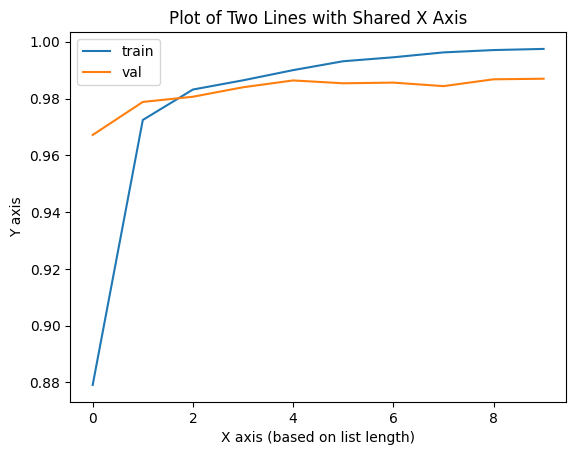

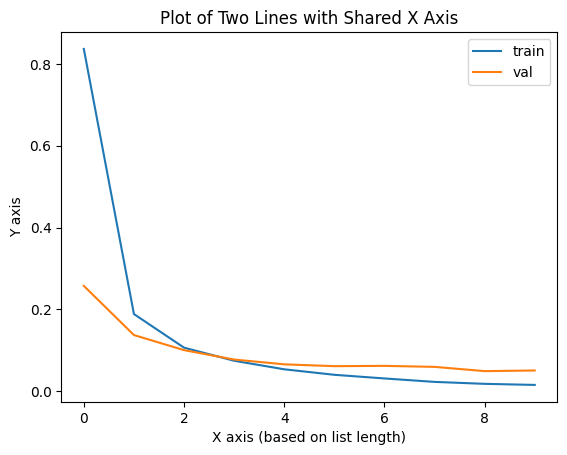

In [ ]:
plot_two_lines_same_x(acc_train_all1, acc_val_all1, "Epochs", "Accuracy", "Model 1")
plot_two_lines_same_x(loss_train_all1, loss_val_all1, "Epochs", "Loss", "Model 1")

In [ ]:
plot_two_lines_same_x(acc_train_all2, acc_val_all2, "Epochs", "Accuracy", "Model 2")
plot_two_lines_same_x(loss_train_all2, loss_val_all2, "Epochs", "Loss", "Model 2")

In [ ]:
plot_two_lines_same_x(acc_train_all3, acc_val_all3, "Epochs", "Accuracy", "Model 3")
plot_two_lines_same_x(loss_train_all3, loss_val_all3, "Epochs", "Loss", "Model 3")

In [ ]:
plot_two_lines_same_x(acc_train_all4, acc_val_all4, "Epochs", "Accuracy", "Model 4")
plot_two_lines_same_x(loss_train_all4, loss_val_all4, "Epochs", "Loss", "Model 4")

In [ ]:
model_path1 = "./saved_models/PointNet-LR0.0001/model_10.pth"
model_path2 = "./saved_models/PointNet-LR0.00001/model_10.pth"
test_path = "./combined_asl_alphabet/Test_Alphabet"

actuals1, predicteds1, count1, failcount1, wrongs1, errored1 = predict_images(model_path1, test_path, "./misclassified")
actuals2, predicteds2, count2, failcount2, wrongs2, errored2 = predict_images(model_path2, test_path, "./misclassified")

Current sign:test_alphabet
Current sign:r
Current sign:u
Current sign:i
Current sign:n
Current sign:g
Current sign:z
Current sign:t
Current sign:s
Current sign:a
Current sign:f
Current sign:o
Current sign:h
Current sign:blank
Current sign:del
Current sign:space
Current sign:m
Current sign:j
Current sign:c
Current sign:d
Current sign:v
Current sign:q
Current sign:x
Current sign:e
Current sign:b
Current sign:k
Current sign:l
Current sign:y
Current sign:p
Current sign:w
Current sign:test_alphabet
Current sign:r
Current sign:u
Current sign:i
Current sign:n
Current sign:g
Current sign:z
Current sign:t
Current sign:s
Current sign:a
Current sign:f
Current sign:o
Current sign:h
Current sign:blank
Current sign:del
Current sign:space
Current sign:m
Current sign:j
Current sign:c
Current sign:d
Current sign:v
Current sign:q
Current sign:x
Current sign:e
Current sign:b
Current sign:k
Current sign:l
Current sign:y
Current sign:p
Current sign:w


In [ ]:
print(errored1)
accuracy1 = calculate_accuracy(actuals1, predicteds1)
print(accuracy1)

[]
0.9910394265232975


In [ ]:
print(errored2)
accuracy2 = calculate_accuracy(actuals2, predicteds2)
print(accuracy2)

[]
0.9919427036705462
